# `01` Import Necessary Libraries

## `i` Default Libraries

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

## `ii` Additional Libraries
Add imports for additional libraries you used throughout the notebook

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler , RobustScaler
from sklearn.pipeline import Pipeline


----------------------------

# `02` Load Data

In [63]:
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [64]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [65]:
housing.drop(columns=["total_bedrooms"], inplace=True)
housing.dropna(inplace=True)

## `*` Create Test Set

Before exploring the data, let's split the data into training and test sets. You shouldn't touch the test set from this point furthur except for final model evaluation.

Use:
- `random_state` $= 1234$
- `test_size` $= 0.2$

In [66]:
X = housing.drop("median_house_value", axis=1)
y = housing["median_house_value"]  

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [67]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

----------------

# `03` Exploratory Data Analysis (EDA)

## `i` Simple Analysis

Preview data, perform statistical data analysis and explore as much as needed to better understand the data set we're dealing with.

`Note:` Feel free to look up EDA approaches online for inspiration (however you **must understand** everything and not copy paste).

In [68]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 17595 to 1318
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   population          16512 non-null  float64
 5   households          16512 non-null  float64
 6   median_income       16512 non-null  float64
 7   ocean_proximity     16512 non-null  object 
dtypes: float64(7), object(1)
memory usage: 1.1+ MB


### all data are numbers except ocean_proximity

In [69]:
label_encoder = LabelEncoder()
x_train['ocean_proximity_encoded'] = label_encoder.fit_transform(x_train['ocean_proximity'])
x_train[['ocean_proximity','ocean_proximity_encoded']]

,ocean_proximity,ocean_proximity_encoded
17595,INLAND,1
6073,<1H OCEAN,0
6251,INLAND,1
3161,NEAR BAY,3
1887,INLAND,1
...,...,...
8222,INLAND,1
9449,INLAND,1
8471,<1H OCEAN,0
17048,<1H OCEAN,0


In [70]:
# drop ocean_proximity
x_train.drop('ocean_proximity', axis=1, inplace=True)

In [71]:
x_train.isna().sum()

longitude                  0
latitude                   0
housing_median_age         0
total_rooms                0
population                 0
households                 0
median_income              0
ocean_proximity_encoded    0
dtype: int64

In [72]:
x_test.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

### NO duplicated Data

In [73]:
x_train.duplicated().sum()

0

In [74]:
x_test.duplicated().sum()

0

In [75]:
x_train.describe()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_encoded
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.576297,35.640944,28.629300,2634.395652,1422.226562,499.014595,3.869583,1.173026
std,2.008301,2.141025,12.622547,2195.367194,1119.964665,383.148507,1.896395,1.422299
min,-124.350000,32.540000,1.000000,2.000000,3.000000,1.000000,0.499900,0.000000
25%,-121.802500,33.930000,18.000000,1452.750000,786.000000,280.000000,2.562500,0.000000
50%,-118.500000,34.260000,29.000000,2128.000000,1166.000000,410.000000,3.539400,1.000000
75%,-118.010000,37.720000,37.000000,3138.250000,1720.000000,603.000000,4.748350,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,28566.000000,6082.000000,15.000100,4.000000


## `ii` Visual Analysis

Plot graphs and relations in order to gain more insights about the data set, identify patterns, and make assumptions.


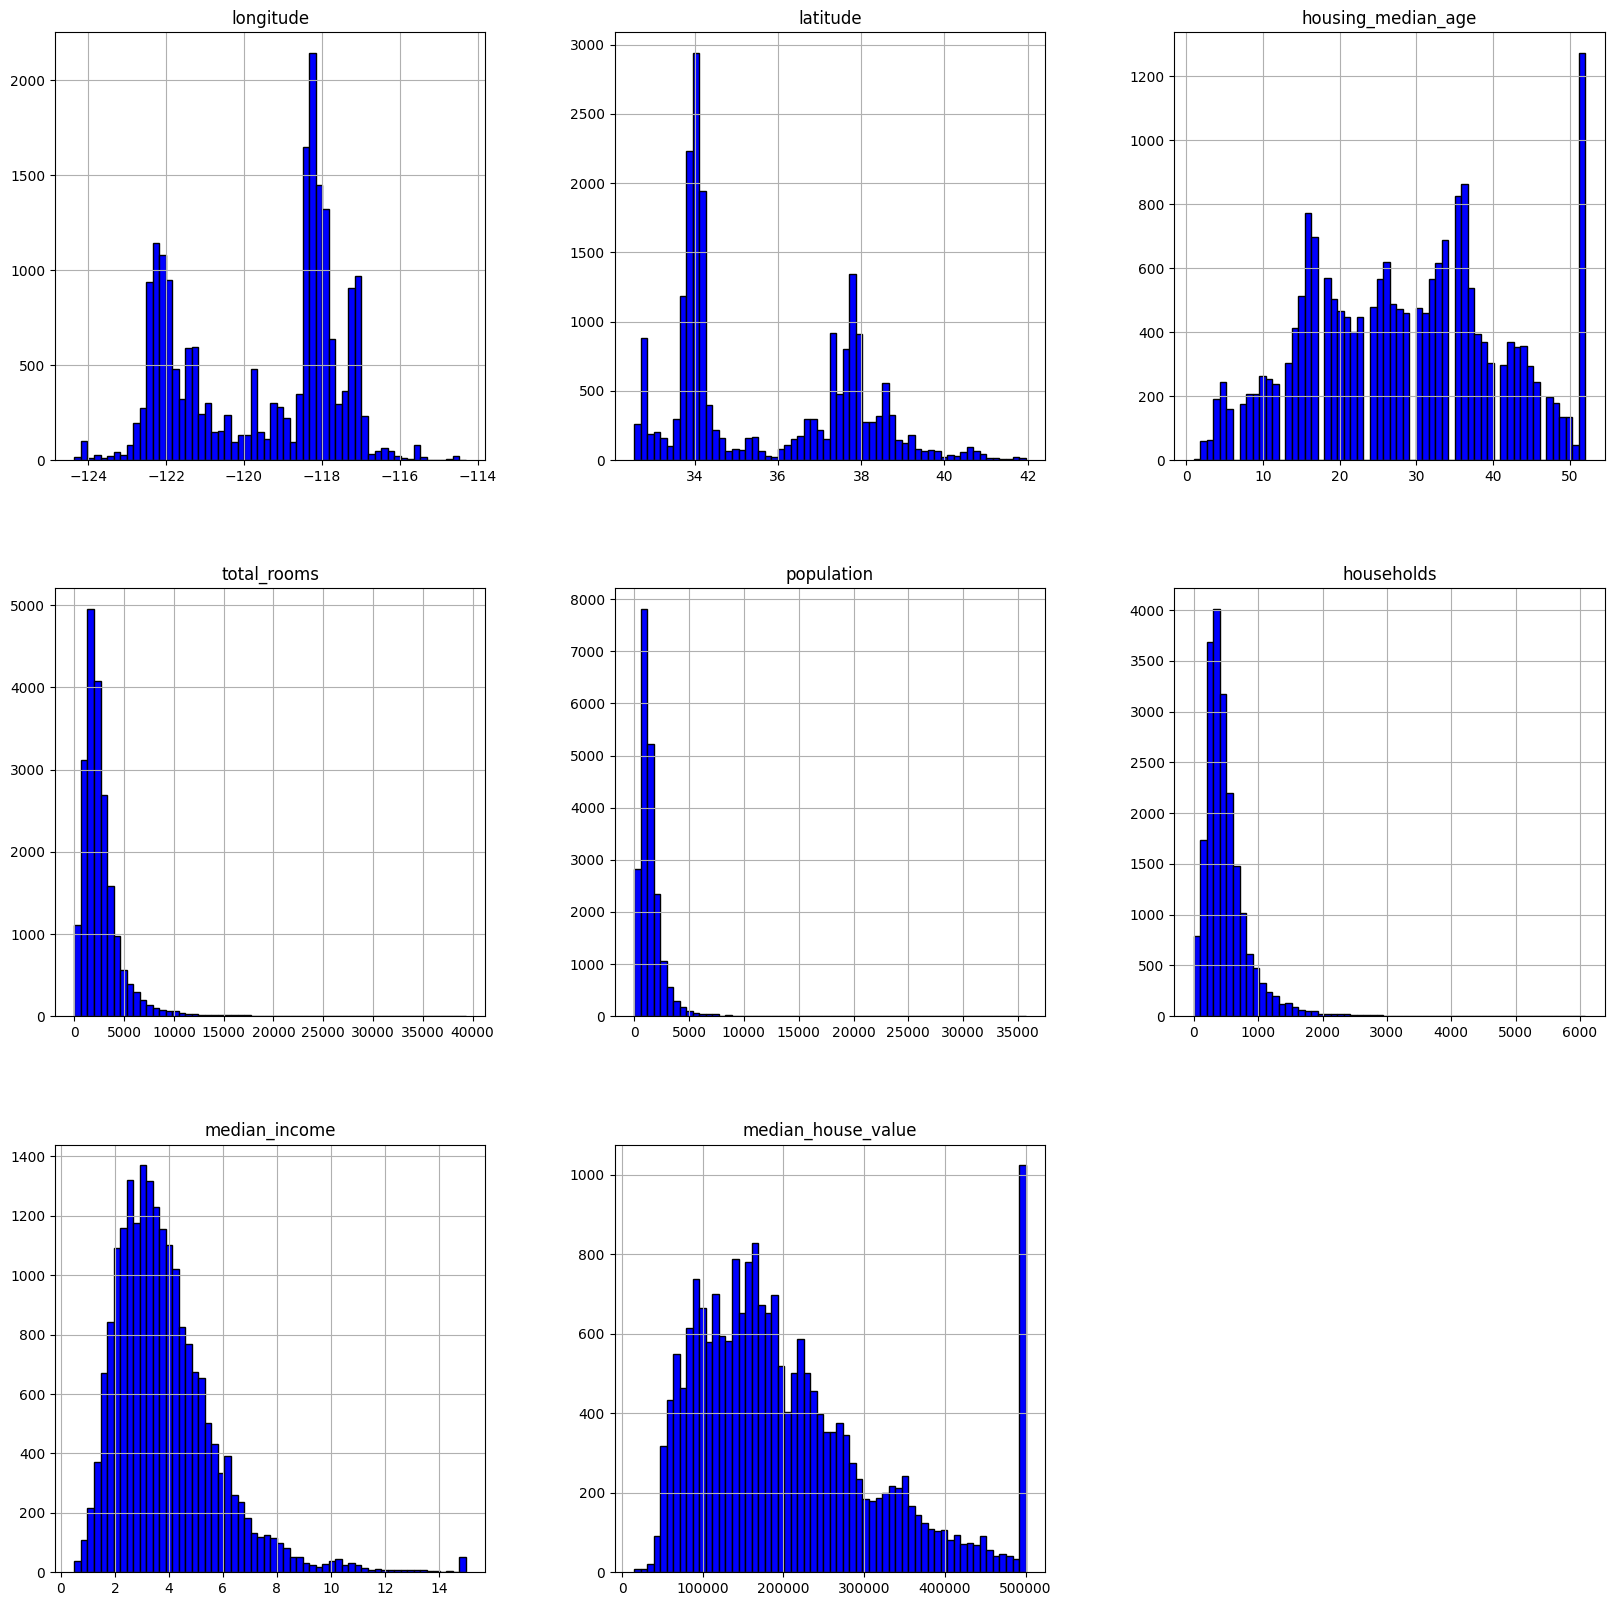

In [76]:
housing.hist(bins=60,figsize=(20,20),color='blue', edgecolor='black')
plt.show()

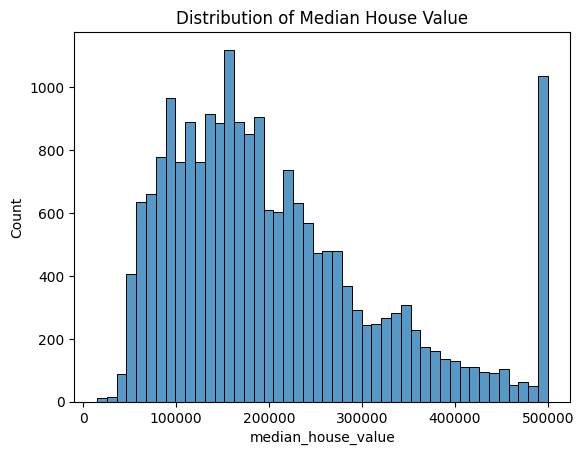

In [77]:
sns.histplot(housing['median_house_value'])
plt.title('Distribution of Median House Value')
plt.show();

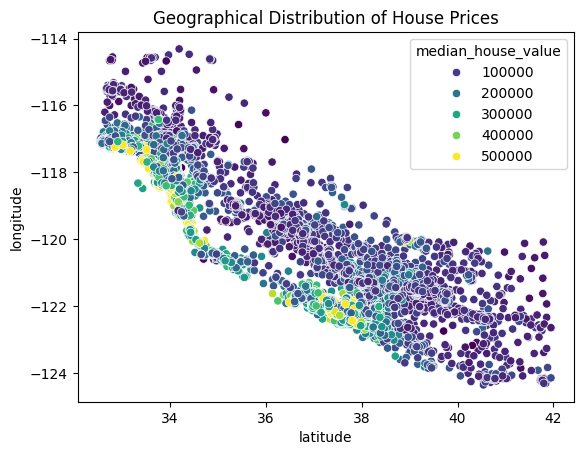

In [78]:
sns.scatterplot(x='latitude', y='longitude', hue='median_house_value', data=housing, palette='viridis')
plt.title('Geographical Distribution of House Prices')
plt.show();

### the position of house has strong correlation with house price

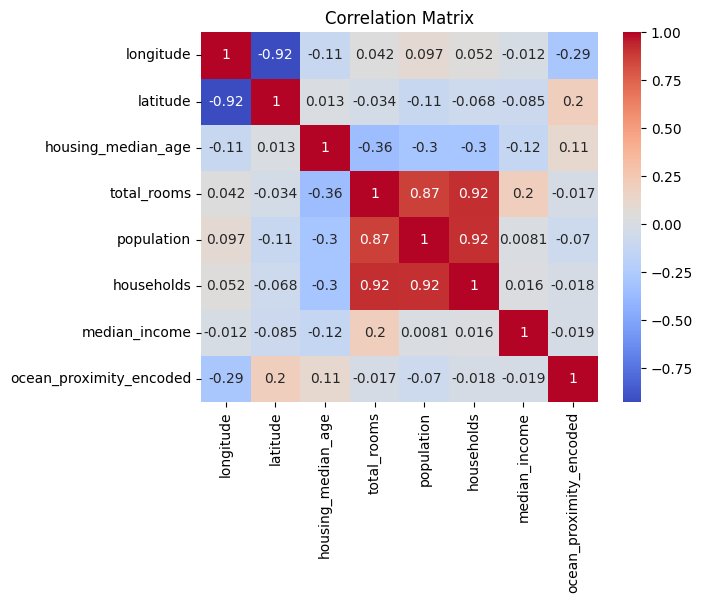

In [79]:
corr_matrix = x_train.corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

----------------

# `04` Data Preparation

In [80]:
scaler = RobustScaler(with_centering=True, with_scaling=True)
columns = x_train.columns
index = x_train.index

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled, columns=columns, index=index)

## `*` Prepare Test Set

Apply the data transformations you used on the training set to the test set.



In [81]:
x_test['ocean_proximity_encoded'] = label_encoder.transform(x_test['ocean_proximity'])
x_test[['ocean_proximity','ocean_proximity_encoded']]
x_test.drop('ocean_proximity', axis=1, inplace=True)

In [82]:
x_test_scaled = scaler.transform(x_test)
x_test = pd.DataFrame(x_test_scaled, columns=x_test.columns, index=x_test.index)

----------------------------

# `05` Normal Equation


## `i` Model Training

Initializing the model, fitting it to the training data, and get a fitted model.

In [83]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [84]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [85]:
y_pred = lr.predict(x_test)

## `ii` Model Evaluation

Evaluate model performance using several metrics, e.g. **RMSE**, **MAE**, $R^2$. etc.

In [86]:
RMSE = mean_squared_error(y_test, y_pred)**0.5
print(f'RMSE: {RMSE}')

RMSE: 71253.12131160608


In [87]:
MAE =mean_absolute_error(y_test, y_pred)
print(f'MAE: {MAE}')

MAE: 51668.82661181424


In [88]:
r2=r2_score(y_test, y_pred)
print(f'R2: {r2}')

R2: 0.6125284083097235


----------------------

# `06` Linear Regression with Gradient Descent

Using `sklearn` implementation of linear regression to model the data.

Hint: Look for `sklearn.linear_model.SGDRegressor` class.

## `i` Baseline Model Training

Initializing the model with initial parameters, fitting it to the training data, and get a baseline model.

Use:
- Non-regularized model.
- Constant `learning_rate`

In [89]:
reg = SGDRegressor(random_state=1234, learning_rate='constant')
reg.fit(x_train, y_train)

SGDRegressor(learning_rate='constant', random_state=1234)

In [90]:
y_pred = reg.predict(x_test)

## `ii` Model Evaluation

Evaluate the baseline model performance using several metrics, e.g. **RMSE**, **MAE**, $R^2$. etc.

In [93]:
rmse = mean_squared_error(y_test, y_pred)**0.5
print(f'RMSE : {rmse}')

RMSE : 72373.95369649118


In [94]:
mae=mean_absolute_error(y_test, y_pred)
print(f'MAE : {mae}')

MAE : 53677.76873355893


In [95]:
R2=r2_score(y_test, y_pred)
print(f'R2 : {R2}')

R2 : 0.600242449185409


## `iii` Tune `learning_rate`

Try different `learning_rate` values and evaluate. What is the optimal learning rate?

Hint: You might want to use `sklearn.model_selection.RandomizedSearchCV` or `sklearn.model_selection.GridSearchCV` classes.

In [ ]:
param_grid = {
    'learning_rate': ['constant', 'adaptive'],
    'eta0': [0.001, 0.01, 0.1, 1, 10],
    'alpha': [0.001, 0.01, 0.1, 1, 10]
}
sgd = SGDRegressor(max_iter=1000, random_state=1234)

grid_search = GridSearchCV(sgd, param_grid, cv=5)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_

print(f'Best parameters: {best_params}')

best_sgd = grid_search.best_estimator_
y_best_pred = best_sgd.predict(x_test)
best_rmse = mean_squared_error(y_test, y_best_pred)**0.5
best_mae = mean_absolute_error(y_test, y_best_pred)
best_r2 = r2_score(y_test, y_best_pred)

print(f'Best RMSE: {best_rmse}')
print(f'Best MAE: {best_mae}')
print(f'Best R2: {best_r2}')


Best parameters: {'alpha': 0.001, 'eta0': 1, 'learning_rate': 'adaptive'}
Best RMSE: 71270.32601871536
Best MAE: 51679.15811575662
Best R2: 0.6123412687164318


## `iv` Regularization Mode: On

Let's try $l_1$ and $l_2$ regularization. Use default parameters for simplicity. Does regularization made the model generalize better?

Which of the two regularizations performs better?

In [106]:
# Lasso l1 Regularization
lasso = Lasso(random_state=1234)
lasso.fit(x_train, y_train)
pred = lasso.predict(x_test)

r2 = r2_score(y_test,pred)
print(f'R2: {r2}')

R2: 0.6125314035437788


In [105]:
# Ridge l2 Regularization
ridge = Ridge(random_state=1234)
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)


r2 = r2_score(y_test,y_pred)
print(f'R2: {r2}')

R2: 0.6125261506597295


------------------

# `07` Generalization Error

In [111]:
model = SGDRegressor(learning_rate='adaptive', penalty="l1", alpha=0.001, eta0=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


r2 = r2_score(y_test,y_pred)


print(f'R2: {r2}')

R2: 0.6125567861308163


----------------------------------------------